In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rashikrahmanpritom/plant-disease-recognition-dataset

 99% 1.23G/1.25G [00:15<00:00, 92.2MB/s]
100% 1.25G/1.25G [00:15<00:00, 88.4MB/s]


In [ ]:
!unzip /content/plant-disease-recognition-dataset.zip

Archive:  /content/plant-disease-recognition-dataset.zip
  inflating: Test/Test/Healthy/8ddaa5a5caa5caa8.jpg  
  inflating: Test/Test/Healthy/8ddaac1bd6c8cd0a.jpg  
  inflating: Test/Test/Healthy/8ddd5ec1c0de38c4.jpg  
  inflating: Test/Test/Healthy/8def3f60308ab41b.jpg  
  inflating: Test/Test/Healthy/8def4d91382175c3.jpg  
  inflating: Test/Test/Healthy/8df452e2e38c0b6e.jpg  
  inflating: Test/Test/Healthy/8dfae9d78cc32089.jpg  
  inflating: Test/Test/Healthy/8e3dbccdfe08c850.jpg  
  inflating: Test/Test/Healthy/8e68163c62dc57d5.jpg  
  inflating: Test/Test/Healthy/8e6a823cce9ff40c.jpg  
  inflating: Test/Test/Healthy/8e77857194a59a87.jpg  
  inflating: Test/Test/Healthy/8e79802b3fb770c8.jpg  
  inflating: Test/Test/Healthy/8e7986d1ecd36445.jpg  
  inflating: Test/Test/Healthy/8e7e70a6878c1c79.jpg  
  inflating: Test/Test/Healthy/8e82b1a51bd11afe.jpg  
  inflating: Test/Test/Healthy/8e8470687be37378.jpg  
  inflating: Test/Test/Healthy/8e858c8397706b7b.jpg  
  inflating: Test/Test/He

In [ ]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "/content/Train/Train/Healthy"
train_files_powdery = "/content/Train/Train/Powdery"
train_files_rust = "/content/Train/Train/Rust"

test_files_healthy = "/content/Test/Test/Healthy"
test_files_powdery = "/content/Test/Test/Powdery"
test_files_rust = "/content/Test/Test/Rust"

valid_files_healthy = "/content/Validation/Validation/Healthy"
valid_files_powdery = "/content/Validation/Validation/Powdery"
valid_files_rust = "/content/Validation/Validation/Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


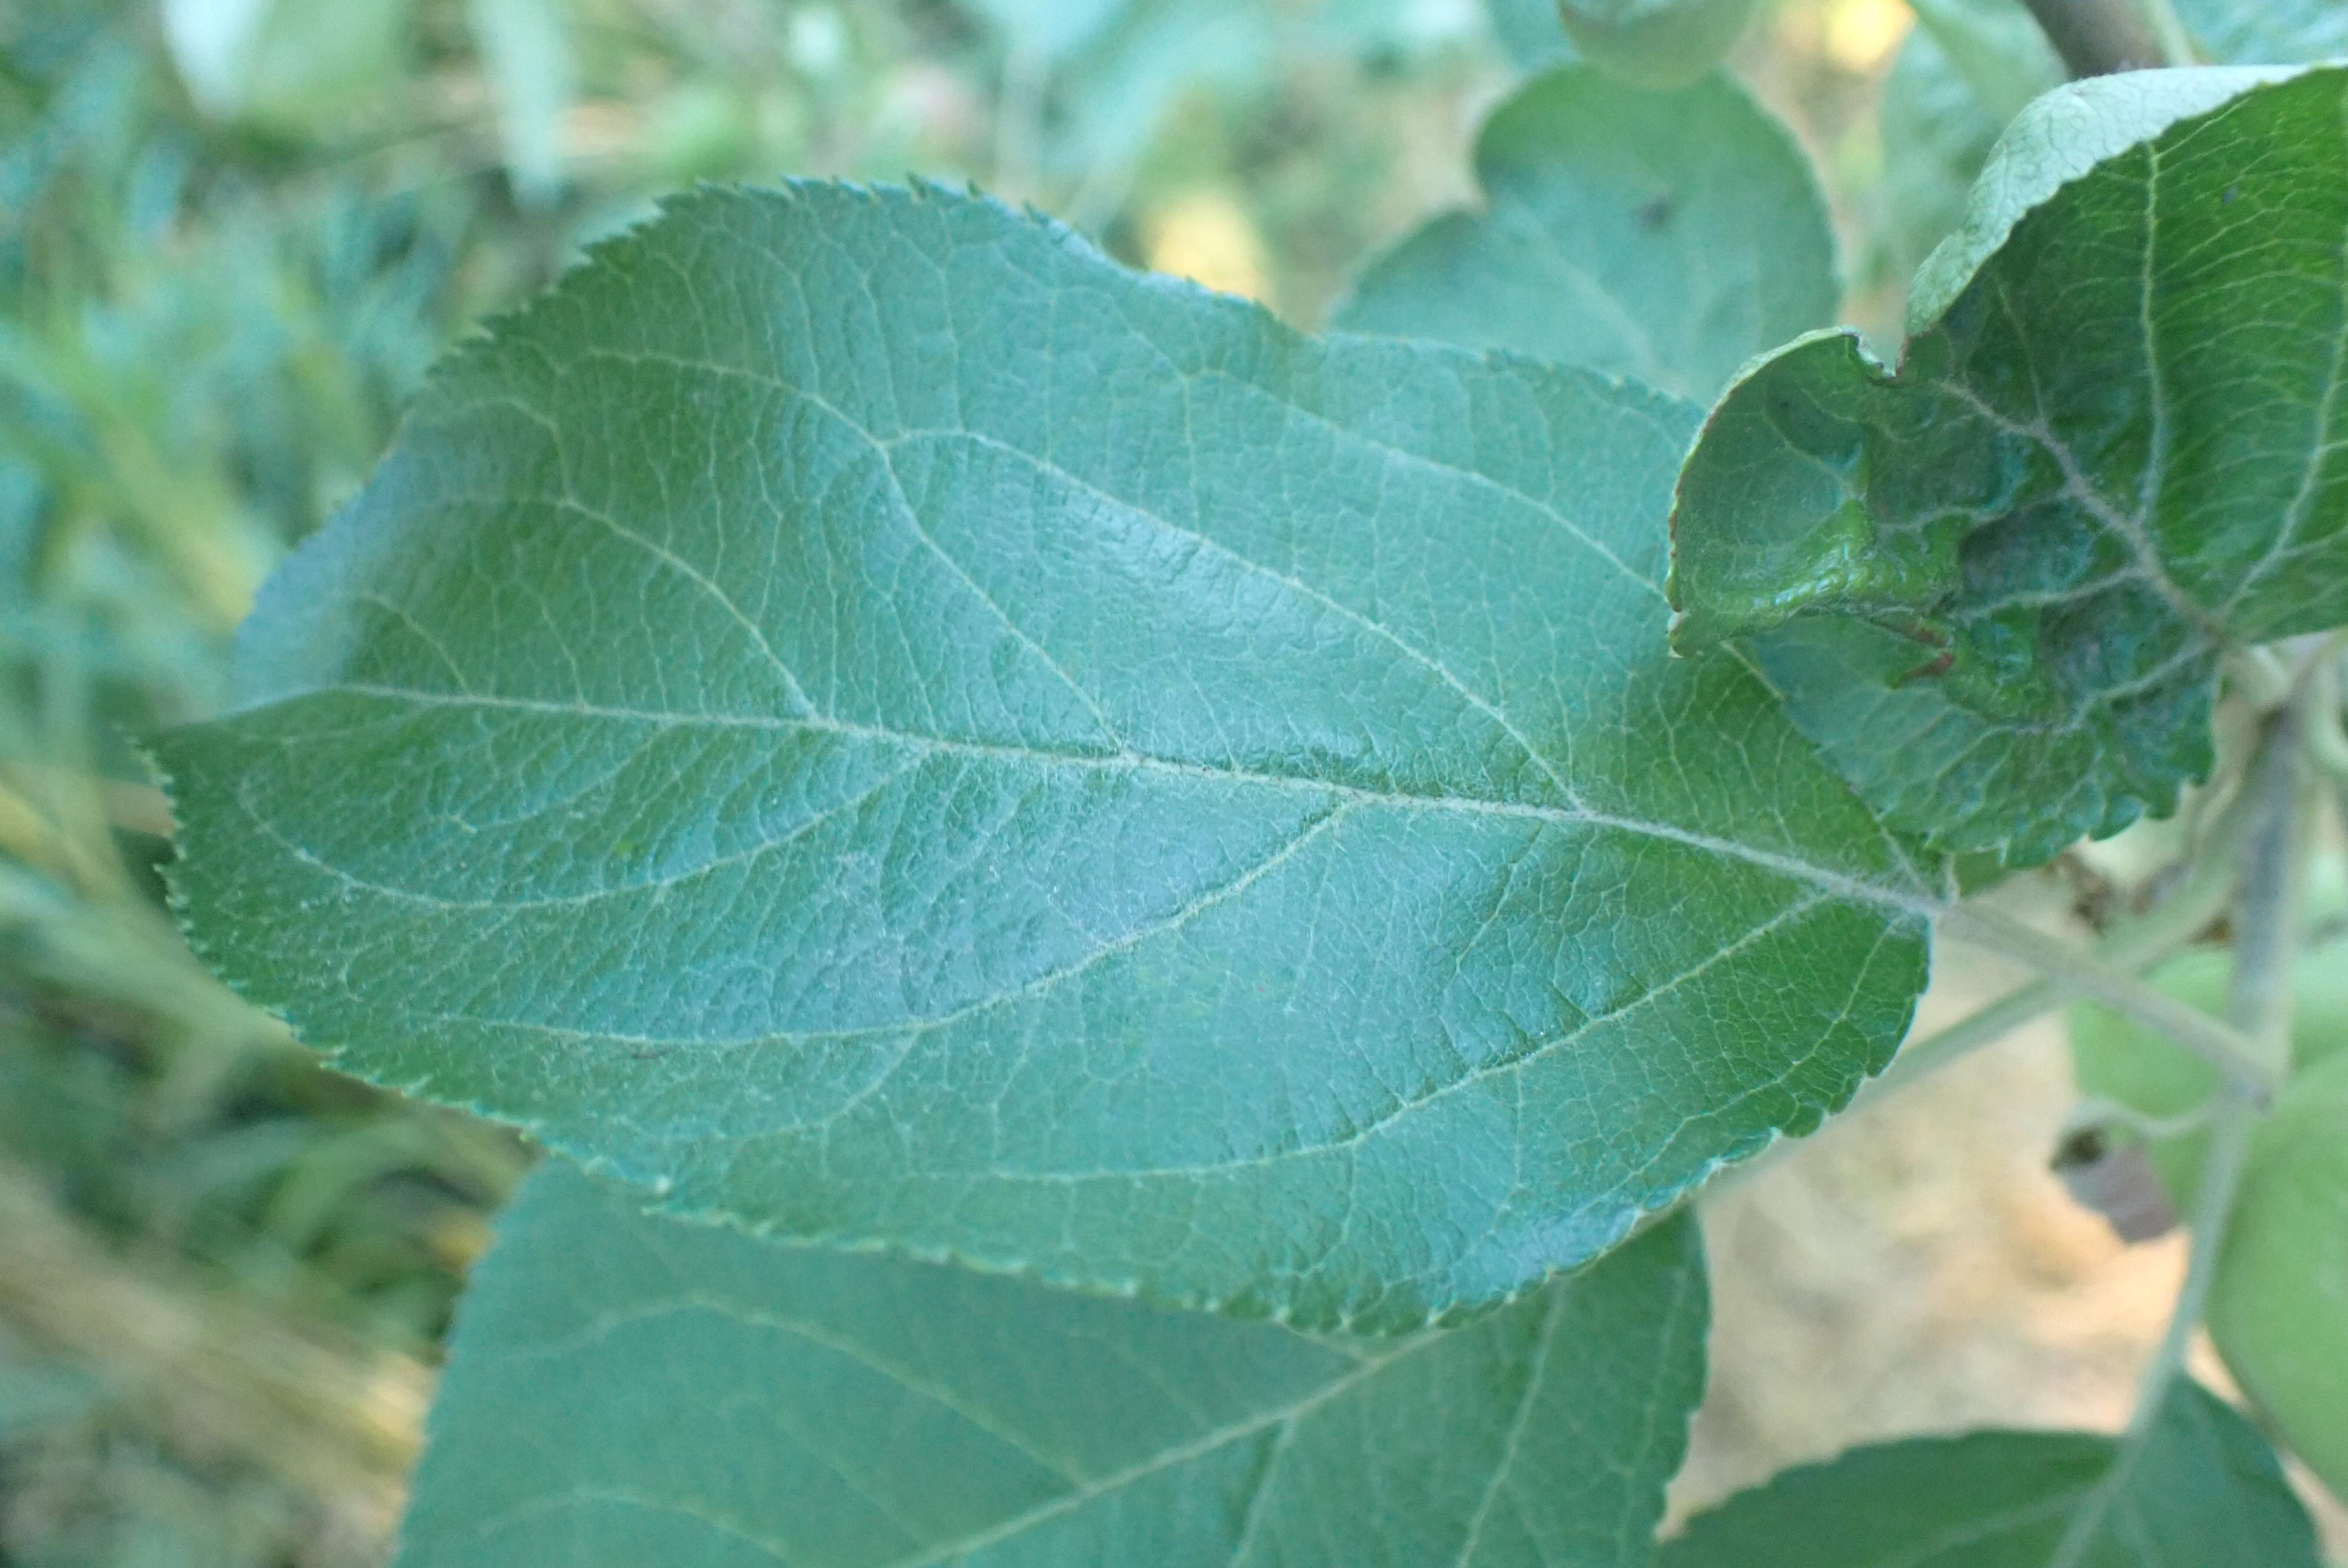

In [ ]:
from PIL import Image
import IPython.display as display

image_path = '/content/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

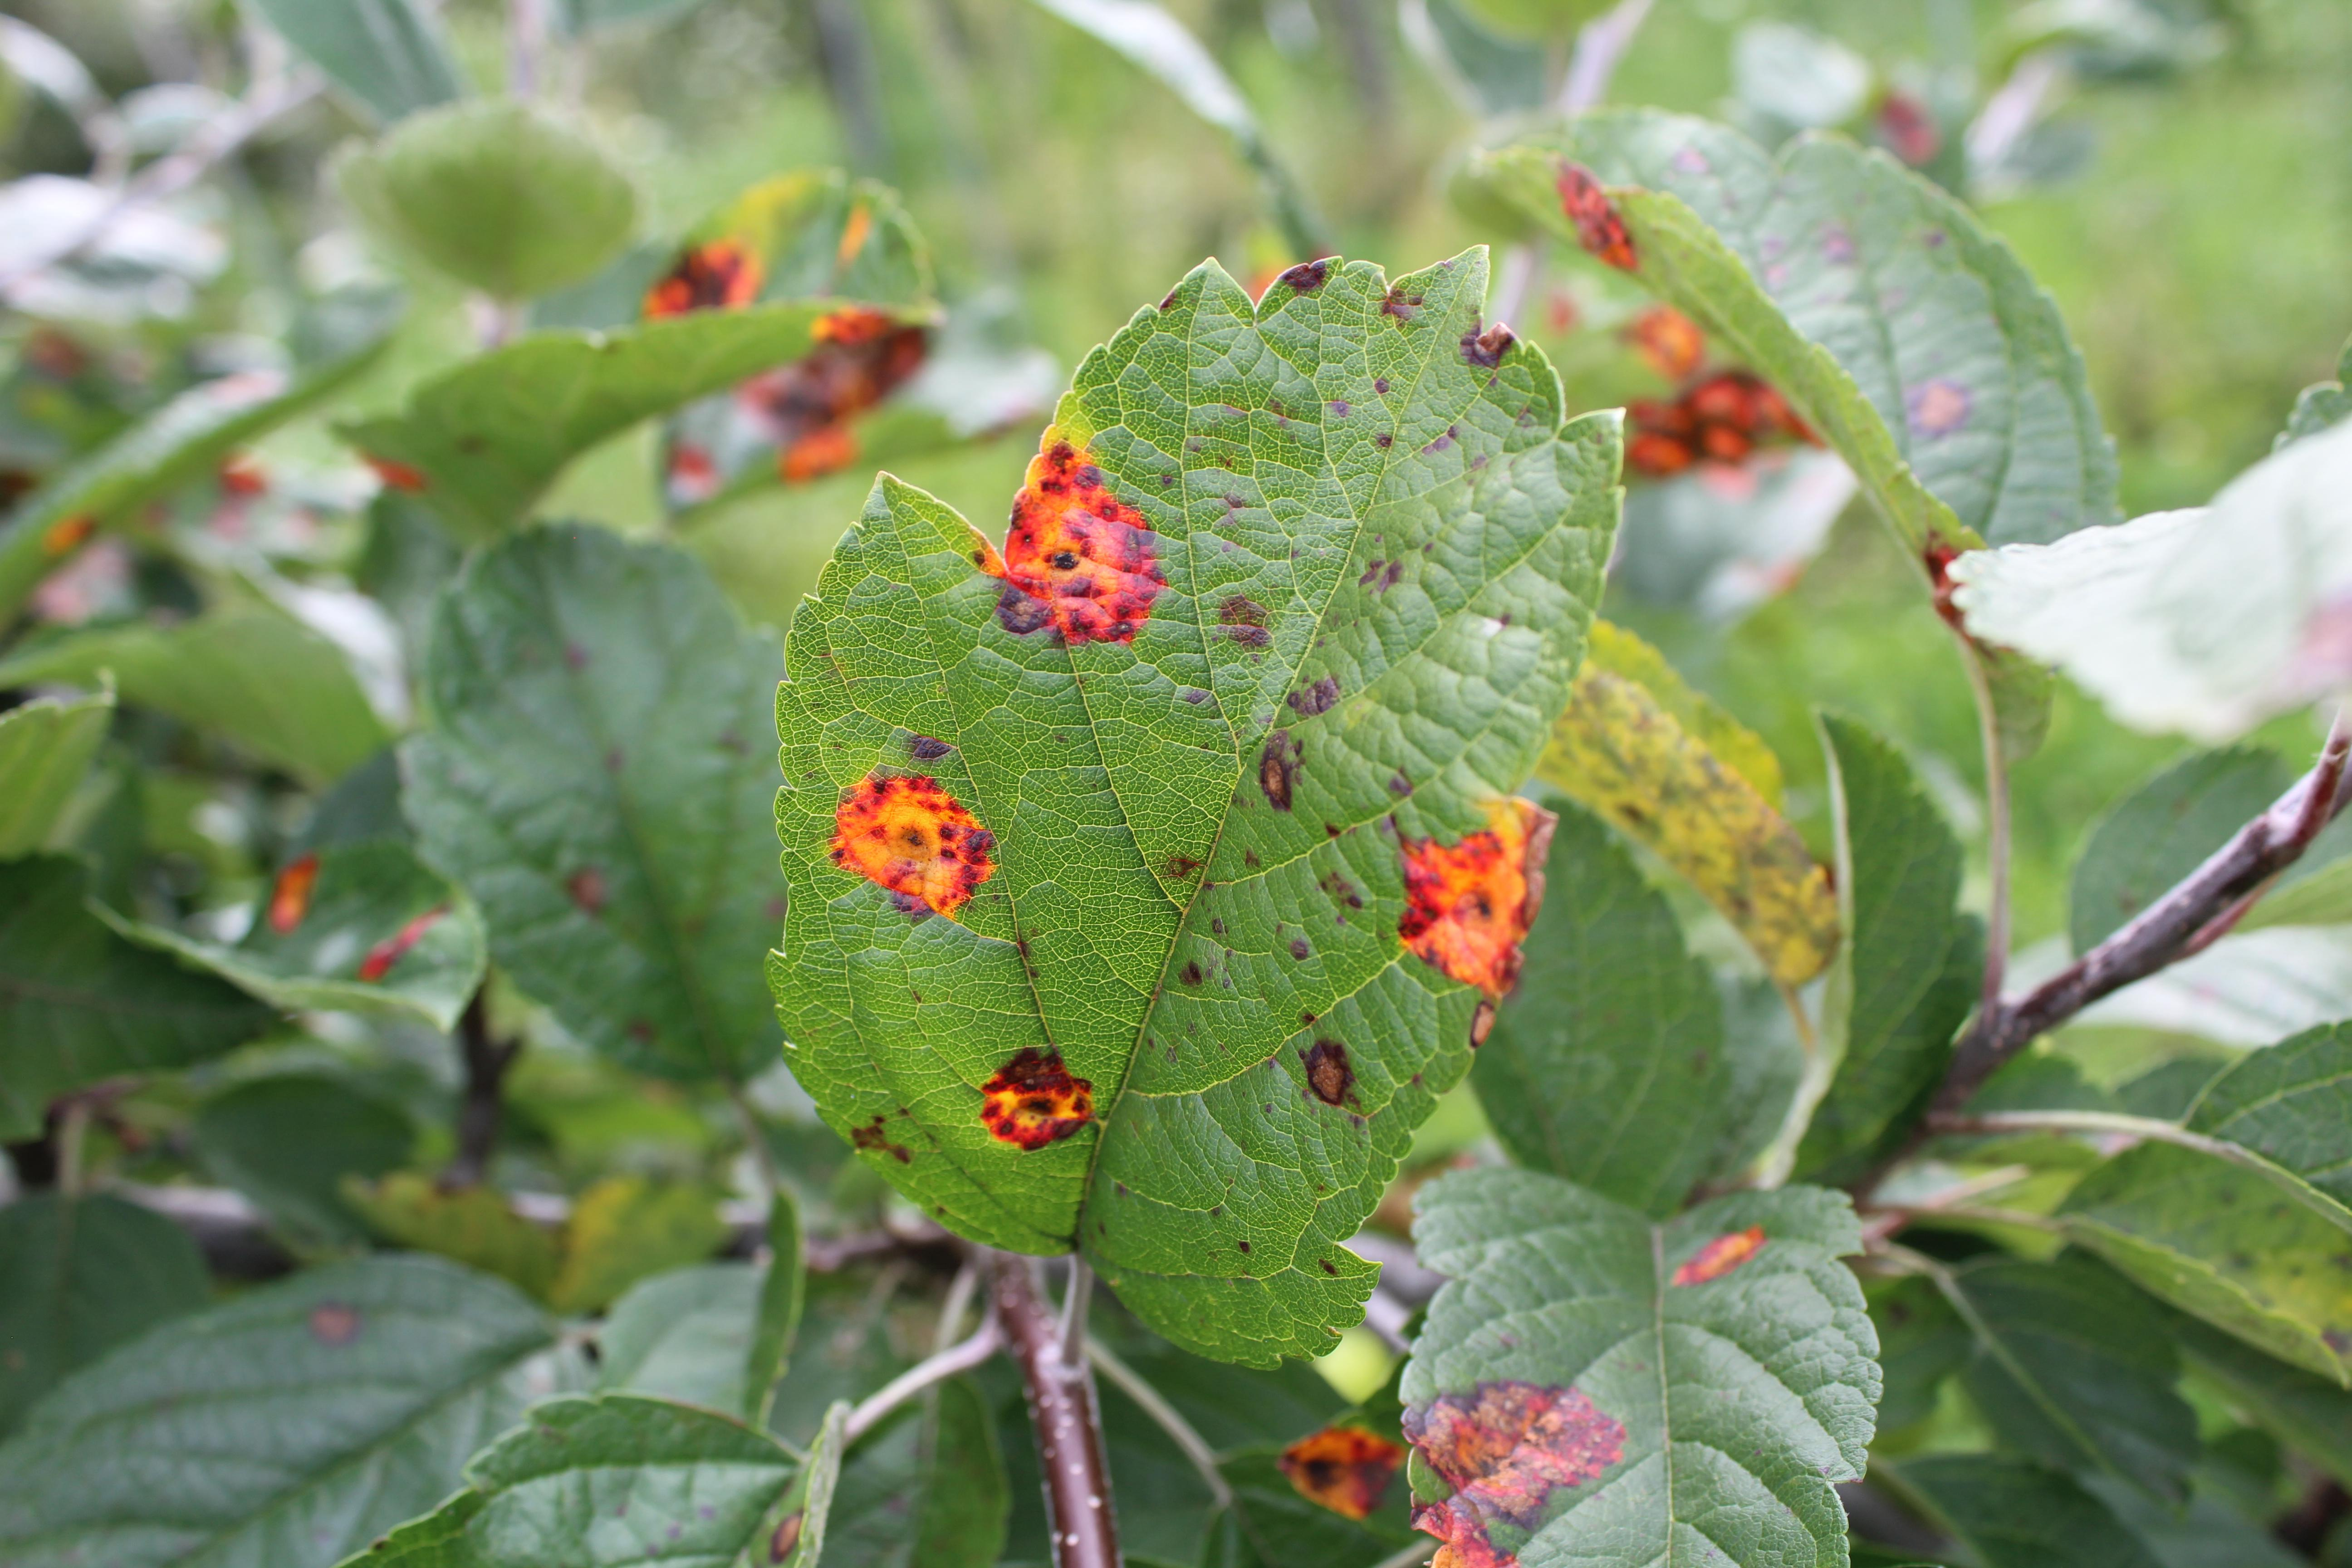

In [ ]:
image_path = '/content/Test/Test/Rust/82add70df6ab2854.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5
42/42 [==============================] - 98s 2s/step - loss: 2.4568 - accuracy: 0.5182 - val_loss: 0.7681 - val_accuracy: 0.6500
Epoch 2/5
42/42 [==============================] - 95s 2s/step - loss: 0.6338 - accuracy: 0.7277 - val_loss: 0.5865 - val_accuracy: 0.7667
Epoch 3/5
42/42 [==============================] - 89s 2s/step - loss: 0.4254 - accuracy: 0.8275 - val_loss: 0.6241 - val_accuracy: 0.8000
Epoch 4/5
42/42 [==============================] - 86s 2s/step - loss: 0.3260 - accuracy: 0.8865 - val_loss: 0.5003 - val_accuracy: 0.7667
Epoch 5/5
42/42 [==============================] - 87s 2s/step - loss: 0.3101 - accuracy: 0.8843 - val_loss: 0.5155 - val_accuracy: 0.8667


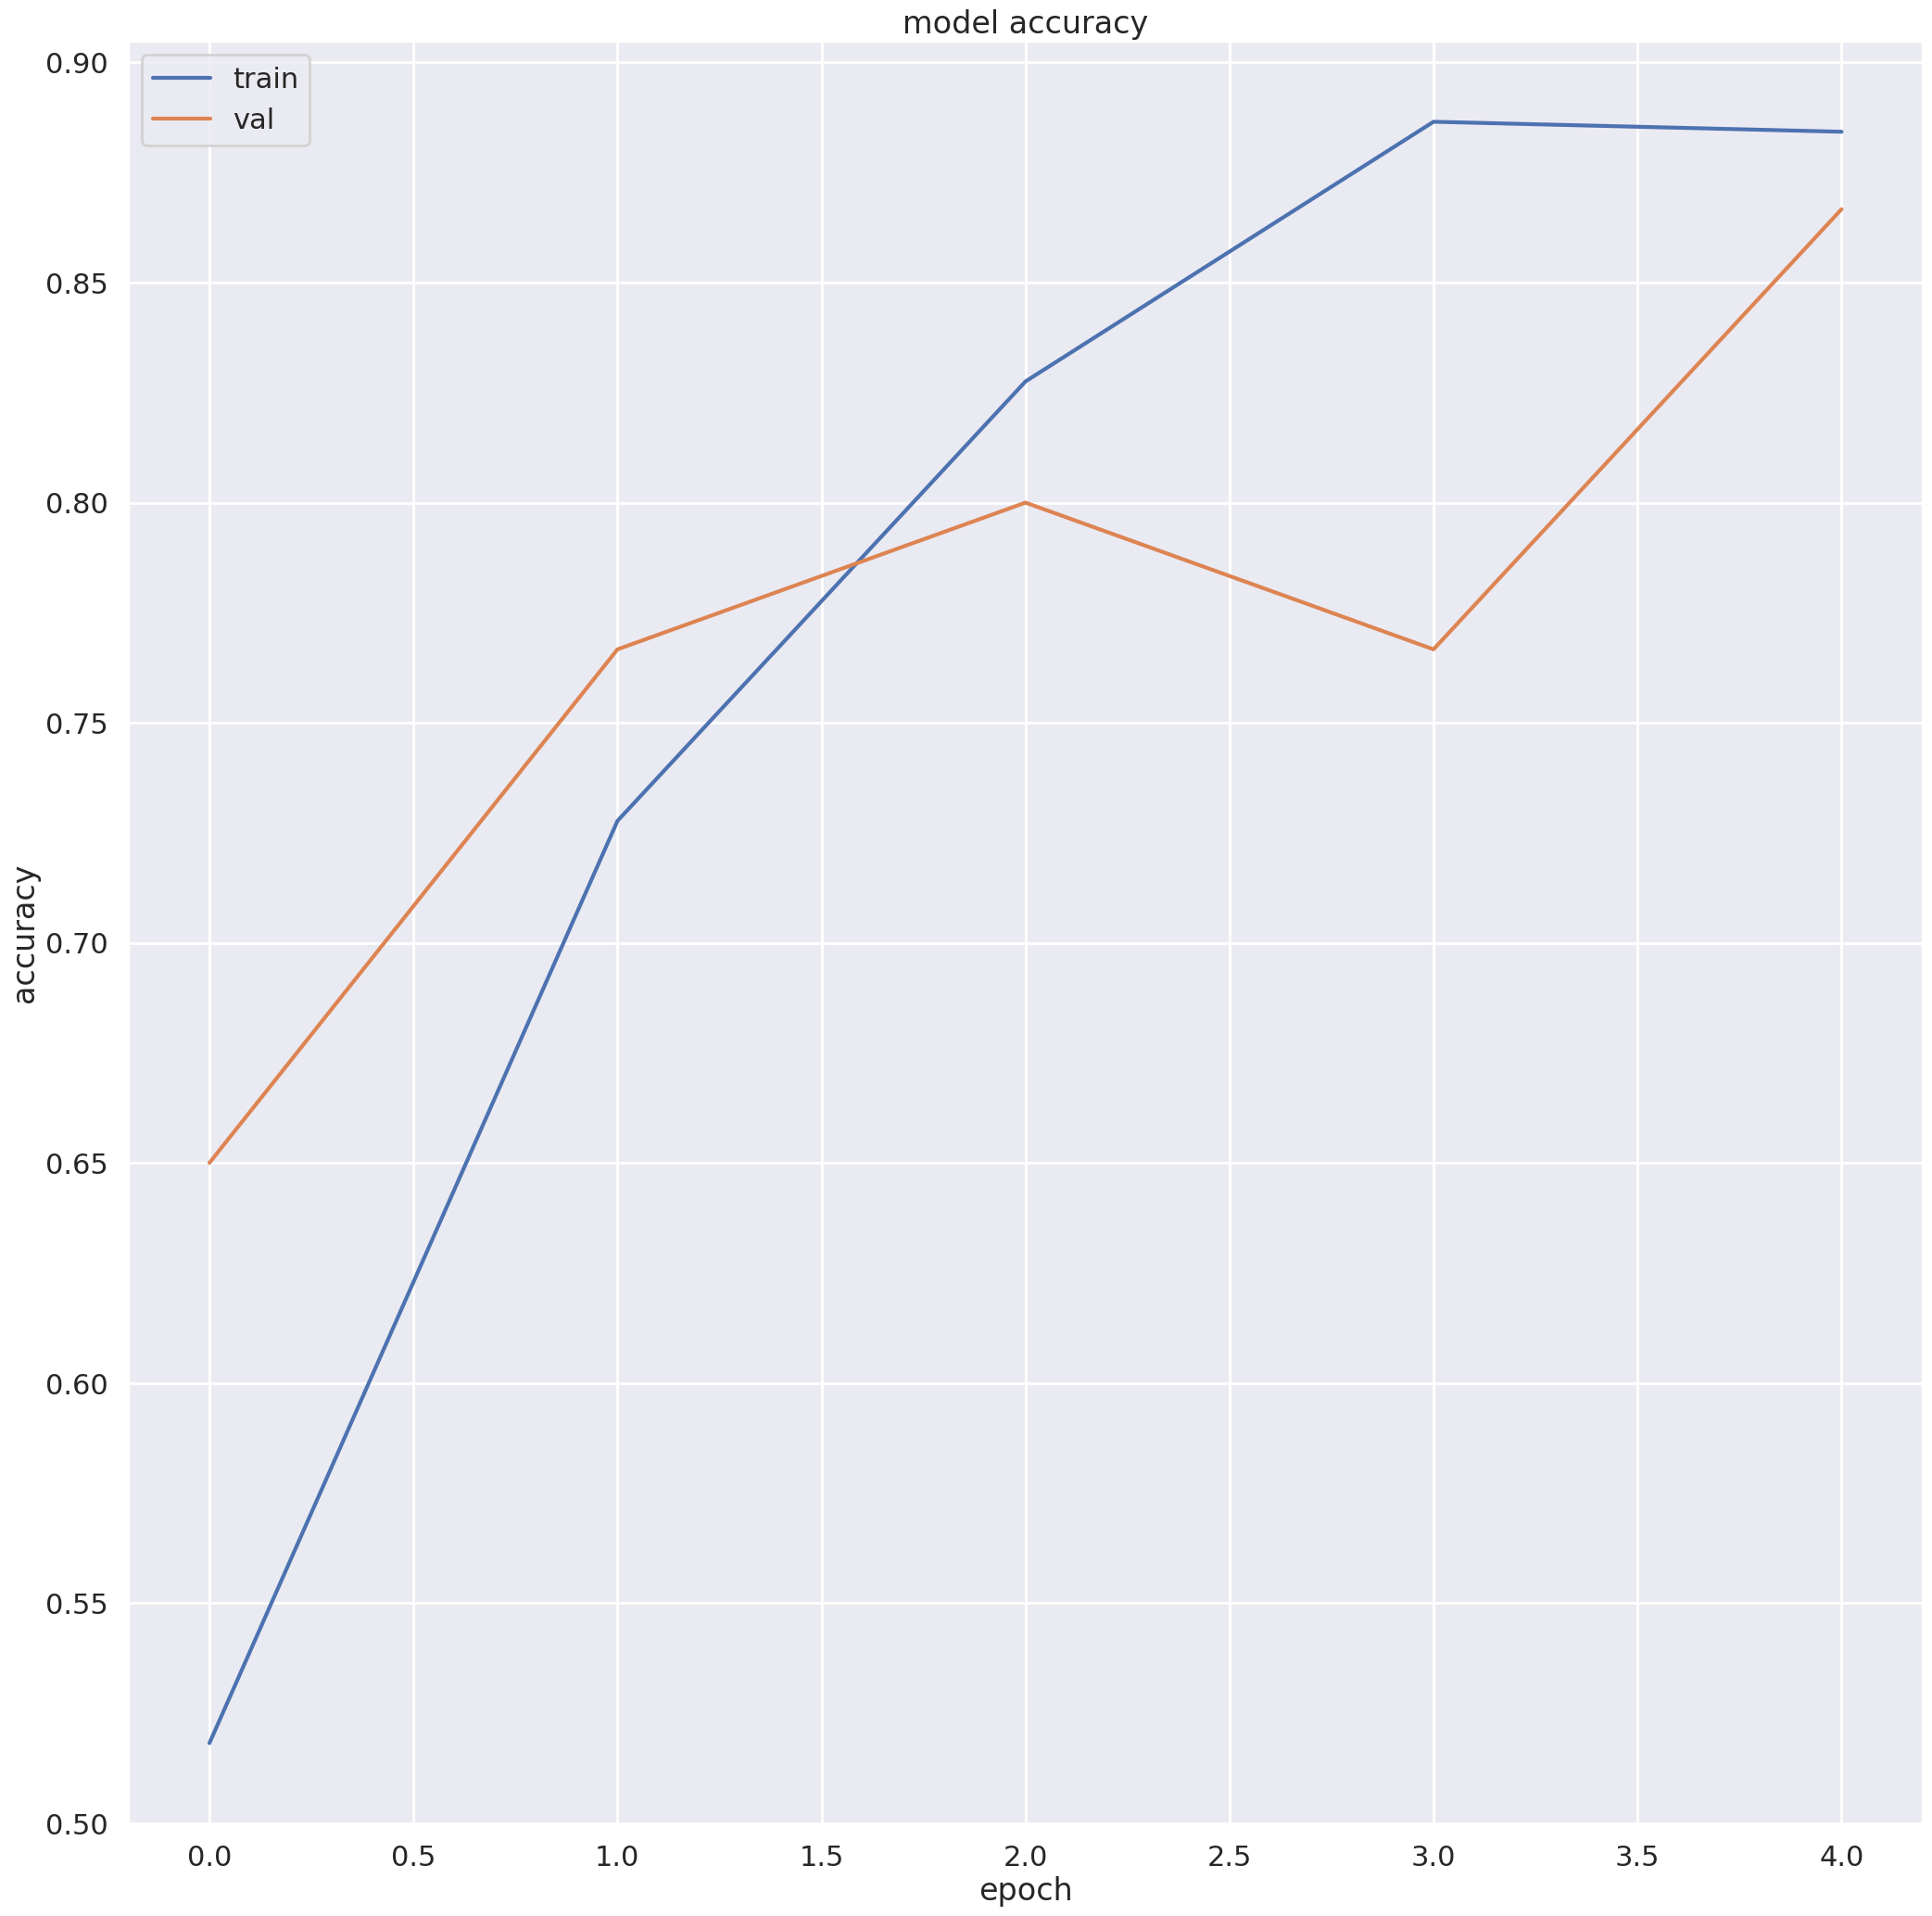

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('/content/Test/Test/Rust/82f49a4a7b9585f1.jpg')

In [ ]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 277ms/step


array([0.01044219, 0.00108202, 0.9884758 ], dtype=float32)

In [ ]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [ ]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
